In [ ]:
# for unzipping the zip file run this
#!unzip '/content/drive/MyDrive/Deepfake/deepfake.zip' -d "/content/drive/MyDrive/Deepfake/"

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Building a deepfake image detection model which is capable of classifying image into two categories Ai-Genrated or Real image using TensorFlow

# Problem Definition
* The model is used for detection of deepfake or Ai-generated images that
  are now widly used for spreading hate speech and fake news.

# Data
* We are using Kaggle data  uploaded on the drive and will also upload     zip file on github  <i>refer https://github.com/vrmaverick/DeepFake_Detector </i>

# Evaluation

* Prediction Probalities should be more than 90% which is this projects goal to acheive

# Features

* Few key information abot features as the project is based on image classification which are unstructured, Thus there is no such distinctive feature but the data is divide into 3 parts . Testing,Training and Validation. and the model will be a binary classifier

In [ ]:
# Importing all required tools
import tensorflow as tf
import tensorflow_hub as hub
from sklearn.model_selection import train_test_split

# For Data Structuring
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# File Handling
import os

# For image processing
from matplotlib.pyplot import imread

In [ ]:
print("TF Version",tf.__version__)
print("TF hub version :",hub.__version__)

TF Version 2.15.0
TF hub version : 0.16.1


# Checking for GPU accessibility
Can change runtime type if needed on  google collab


In [ ]:
print("GPU available"if tf.config.list_physical_devices("GPU")else "Not Available")

GPU available


# Defining all the Functions that are used in the notebook further

In [ ]:
# Generating file paths for images
def paths(p):
  """
  Navigate through Drive paths to access files from a particular folder
  takes one args

  """
  # Specify the folder path within your Google Drive
  folder_path = p
  # List files in the folder
  file_paths = []
  file_name = []
  for root, dirs, files in os.walk(folder_path):
      for file in files:
          file_paths.append(os.path.join(root, file))
          file_name.append(file)
          # print(f"File Path: {os.path.join(root, file)}")
  return file_paths,file_name

# Image Preprocessing
def process_image(ImagePath):
  """
  Take image file path and convert image into tensors

  """



# Getting our data ready

*Turning our images to tensors or numerical format*

To check if image exists on that path run the cell below else one may skip it

In [ ]:
# !ls '/content/drive/MyDrive/Deepfake/Ai vs Real image Detection Dataset/train/FAKE/1069 (10).jpg'

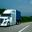

In [ ]:
# Can be used for displaying images
from IPython.display import Image
Image('/content/drive/MyDrive/Deepfake/Ai vs Real image Detection Dataset/train/FAKE/1069 (10).jpg')

# Getting image paths and labels

****************************************************************************

## *Skip Execution if already Done*......................................

In [ ]:
# Accessing File paths of Ai Generated images which will be used for training
file_paths,file_name = paths('/content/drive/MyDrive/Deepfake/Ai vs Real image Detection Dataset/train/FAKE')

In [ ]:
len(file_paths)

37800

In [ ]:
len(file_name)

37800

In [ ]:
# Creating a DataFrame for Convinience
df = pd.DataFrame(file_name, columns=['Image'])
df['Path']= file_paths
df['Class']='Fake'
df.head()

,Image,Path,Class
0,5811 (5).jpg,/content/drive/MyDrive/Deepfake/Ai vs Real ima...,Fake
1,5882.jpg,/content/drive/MyDrive/Deepfake/Ai vs Real ima...,Fake
2,5810 (7).jpg,/content/drive/MyDrive/Deepfake/Ai vs Real ima...,Fake
3,5856 (2).jpg,/content/drive/MyDrive/Deepfake/Ai vs Real ima...,Fake
4,5946 (7).jpg,/content/drive/MyDrive/Deepfake/Ai vs Real ima...,Fake


In [ ]:
# Accessing File paths of Real images which will be used for training
file_paths,file_name = paths('/content/drive/MyDrive/Deepfake/Ai vs Real image Detection Dataset/test/REAL')


KeyboardInterrupt: 

In [ ]:
print(len(file_name))
new_data = pd.DataFrame(file_name, columns=['Image'])
new_data['Path'] = file_paths
new_data['Class'] = 'Real'
resulting_data = pd.concat([df, new_data], ignore_index=True)
del new_data
resulting_data

In [ ]:

resulting_data['Class'].value_counts()
resulting_data.to_csv('//content/drive/MyDrive/Deepfake/Test_Info.csv', index=False)

## Start Execution from below to save time no need to redo *****************

****************************************************************************

In [ ]:
# resulting_data.to_csv('//content/drive/MyDrive/Deepfake/Test_Info.csv', index=False)
resulting_data = pd.read_csv('//content/drive/MyDrive/Deepfake/Test_Info.csv')
resulting_data

,Image,Path,Class
0,5811 (5).jpg,/content/drive/MyDrive/Deepfake/Ai vs Real ima...,Fake
1,5882.jpg,/content/drive/MyDrive/Deepfake/Ai vs Real ima...,Fake
2,5810 (7).jpg,/content/drive/MyDrive/Deepfake/Ai vs Real ima...,Fake
3,5856 (2).jpg,/content/drive/MyDrive/Deepfake/Ai vs Real ima...,Fake
4,5946 (7).jpg,/content/drive/MyDrive/Deepfake/Ai vs Real ima...,Fake
...,...,...,...
47795,0134 (8).jpg,/content/drive/MyDrive/Deepfake/Ai vs Real ima...,Real
47796,0049 (6).jpg,/content/drive/MyDrive/Deepfake/Ai vs Real ima...,Real
47797,0103 (8).jpg,/content/drive/MyDrive/Deepfake/Ai vs Real ima...,Real
47798,0055 (8).jpg,/content/drive/MyDrive/Deepfake/Ai vs Real ima...,Real


# Categorigal labels to tensors

In [ ]:
labels = resulting_data['Class'].to_numpy()

In [ ]:
labels

array(['Fake', 'Fake', 'Fake', ..., 'Real', 'Real', 'Real'], dtype=object)

In [ ]:
# len(labels)
unique = np.unique(labels)

Turning Labels into boolean or numeric form

In [ ]:
bool_labels = [label == unique for label in labels]
bool_labels[:10]

[array([ True, False]),
 array([ True, False]),
 array([ True, False]),
 array([ True, False]),
 array([ True, False]),
 array([ True, False]),
 array([ True, False]),
 array([ True, False]),
 array([ True, False]),
 array([ True, False])]

In [ ]:
len(bool_labels) #just for verification

47800

In [ ]:
# Converting bool to Tensors
print("Binary Matrix = [fake,real]")
print(labels[47797])
print(bool_labels[47797].astype(int)) # as we have only two classes


Binary Matrix = [fake,real]
Real
[0 1]


# To reduce Time between Expirimentation we will take help of sampling 1000 images first to get good idea of the parameters

So we will start with 1000 images

In [ ]:
# Number of images for expirimenting
NUM_IMAGES = 1000 #@param {type:"slider",min:100,max:47000}

# Modelling

In [ ]:
# df = pd.read_csv('//content/drive/MyDrive/Deepfake/Test_Info.csv')
# df

In [ ]:
X = resulting_data['Path'].to_numpy()
print(X[:10],"Length :",len(X))

['/content/drive/MyDrive/Deepfake/Ai vs Real image Detection Dataset/train/FAKE/5811 (5).jpg'
 '/content/drive/MyDrive/Deepfake/Ai vs Real image Detection Dataset/train/FAKE/5882.jpg'
 '/content/drive/MyDrive/Deepfake/Ai vs Real image Detection Dataset/train/FAKE/5810 (7).jpg'
 '/content/drive/MyDrive/Deepfake/Ai vs Real image Detection Dataset/train/FAKE/5856 (2).jpg'
 '/content/drive/MyDrive/Deepfake/Ai vs Real image Detection Dataset/train/FAKE/5946 (7).jpg'
 '/content/drive/MyDrive/Deepfake/Ai vs Real image Detection Dataset/train/FAKE/5866 (3).jpg'
 '/content/drive/MyDrive/Deepfake/Ai vs Real image Detection Dataset/train/FAKE/5955 (9).jpg'
 '/content/drive/MyDrive/Deepfake/Ai vs Real image Detection Dataset/train/FAKE/5900 (2).jpg'
 '/content/drive/MyDrive/Deepfake/Ai vs Real image Detection Dataset/train/FAKE/5865 (6).jpg'
 '/content/drive/MyDrive/Deepfake/Ai vs Real image Detection Dataset/train/FAKE/5856 (5).jpg'] Length : 47800


In [ ]:
Y = bool_labels
print(Y[:10],"Length :",len(Y))

[array([ True, False]), array([ True, False]), array([ True, False]), array([ True, False]), array([ True, False]), array([ True, False]), array([ True, False]), array([ True, False]), array([ True, False]), array([ True, False])] Length : 47800


In [ ]:
X_train,X_test,Y_train,Y_test = train_test_split(X[:NUM_IMAGES],Y[:NUM_IMAGES],test_size=0.2,random_state=8) # Good For Expirimenting Faster Results
print(f'Xtrain length ={len(X_train)} ,Ytrain length ={len(Y_train)} ,Xtest length ={len(X_test)} ,Ytest length ={len(Y_test)}')

Xtrain length =800 ,Ytrain length =800 ,Xtest length =200 ,Ytest length =200


## Preprocessing images : Turning Images to tensors

Preprocess our images into tensors we are going to write a function so it can be reused

1. Take a image filepath as inputs
2. Use tensorflow to read file and save it to variable `image`
3. Turn `image` into tensors (jpg)
4. Resize the image to shape (224,224)
5. Return the modified image




***************************************************************************


 Optional : before lets see how to conver images in numpy arrays and image analysis

In [ ]:
image = imread(X[4]) # Converts img to nupy array
print(image.shape) # Aspect ratio with colur lane
print(f'Minimum and Maximum value of a pixel ({image.max()},{image.min()})')

(32, 32, 3)
Minimum and Maximum value of a pixel (255,0)


In [ ]:
# Converting array to tensor for faster computation
tf.constant(image)[:1]

<tf.Tensor: shape=(1, 32, 3), dtype=uint8, numpy=
array([[[ 74,  58,   6],
        [ 75,  58,   6],
        [ 77,  57,   7],
        [ 80,  56,   8],
        [ 82,  55,  10],
        [ 86,  55,  11],
        [ 88,  53,  13],
        [ 90,  52,  13],
        [ 94,  52,  14],
        [ 90,  48,  10],
        [ 91,  49,  11],
        [ 97,  55,  17],
        [ 98,  59,  20],
        [ 95,  56,  17],
        [ 92,  54,  15],
        [ 91,  56,  16],
        [ 89,  57,  19],
        [ 88,  59,  19],
        [ 91,  59,  20],
        [ 93,  60,  17],
        [ 94,  59,  17],
        [ 97,  58,  15],
        [ 99,  57,  17],
        [ 99,  55,  18],
        [100,  51,  18],
        [100,  51,  19],
        [103,  49,  23],
        [103,  49,  23],
        [104,  48,  23],
        [104,  48,  23],
        [104,  48,  21],
        [104,  48,  21]]], dtype=uint8)>

***************************************************************************

In [ ]:
IMG_SIZE = 224 # image size (224,224) is recomended
